In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd

In [2]:
import xlrd

In [3]:
eng_data = pd.read_excel('english_tweets.xlsx')

In [4]:
eng_data.drop(eng_data.index[2249:],inplace=True)

In [5]:
eng_data.tail()

,serial,usernameTweet,ID,dead,infected,admitted,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id,location,bloodgroup
2244,2245.0,IDRC_CRDI,2.920236e+17,NaN,NaN,NaN,much do we know about #dengue in Dhaka ? Very ...,/IDRC_CRDI/status/292023551857401857,1.0,0.0,0.0,2013-01-18 03:40:14,NaN,NaN,0.0,0.0,4.006517e+07,dhaka ;,
2245,2246.0,BuzzMosquitoes,2.920261e+17,NaN,NaN,NaN,Learn more 2night! http:// ow.ly/gUceA MT @idr...,/BuzzMosquitoes/status/292026068213321729,0.0,0.0,0.0,2013-01-18 03:50:14,NaN,NaN,0.0,0.0,9.729061e+08,dhaka ;,
2246,2247.0,AbbTakk,6.524233e+17,NaN,NaN,NaN,http:// urdu.abbtakk.tv/storiesmashraf imurtaz...,/AbbTakk/status/652423318096601088,2.0,2.0,0.0,2015-10-09 16:00:15,NaN,NaN,0.0,0.0,1.017159e+09,bangladesh ;,
2247,2248.0,BharatToday,6.524444e+17,NaN,NaN,NaN,http://www. bhaarattoday.com/news/sports/st or...,/BharatToday/status/652444384252694528,0.0,1.0,0.0,2015-10-09 17:23:57,NaN,NaN,0.0,0.0,2.961749e+09,bangladesh ;,
2248,2249.0,BreakDengue,9.760047e+17,NaN,NaN,NaN,any Aedes mosquito breeding ground or its eggs...,/BreakDengue/status/976004666139037697,7.0,7.0,1.0,2018-03-20 13:57:00,1.0,https://t.co/jmtoc4FpkB,0.0,0.0,1.513674e+09,bangladesh ;,


In [6]:
len(eng_data)

2249

In [7]:
eng_data.fillna('0',inplace=True)

In [8]:
eng_data.drop('serial',inplace=True,axis=1)

In [9]:
len(eng_data)

2249

In [10]:
data = list(eng_data['text'])

In [11]:
data

['Sayeed Khokon launches a drive in order to eradicate larvae of Aedes mosquito from Dhaka South City Corporation area #Bangladesh https://www. thedailystar.net/city/dscc-mayo r-sayeed-khokon-launches-drive-against-aedes-mosquito-1595017 Â\xa0 â€¦',
 'What are the risk factors for the presence of #dengue vector mosquitoes? Determinants of their prevalence and larval site selection in Dhaka , http:// bit.ly/2yXGi2v Â\xa0 in @PLOSONE w/ @um_research @PHAC_GC HT @GovCanHealth @UM_RadyFHS pic.twitter.com/RiKy4UHajZ',
 'Emergency (O-) Blood Needed for Dengue patient. Place: Insaf Barakah Hospital, Moghbazar Contact: 01911831932 â€” looking for O- blood donors in Dhaka https://www. facebook.com/10000024204126 6/posts/2282699395081440/ Â\xa0 â€¦',
 'Dengue on the rise in #Dhaka , with 93 people hospitalised in the first 4 days of July & 250 in June, and 3 deaths. A friend worried about #chikungunya , transmitted by the same mosquito says anti- mosquito drives are not working as the pesticides

In [12]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [10]:
new_data = []

for i in range (len(data)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', data[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(data[i])

data = new_data

In [11]:
data = [data[i].replace('#','') for i in range(len(data))]

In [12]:
eng_data['text'] = data

In [13]:
eng_data

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id
0,icddr_b,7.565394e+08,What are the risk factors for the presence of ...,/icddr_b/status/1013393046006915072,2.0,3.0,0.0,2018-07-01 05:05:04,False,false,False,False,4.550359e+08
1,Partho_Sahid,2.119500e+09,Emergency (O-) Blood Needed for Dengue pat...,/Partho_Sahid/status/1015170850297806848,0.0,0.0,0.0,2018-07-06 02:49:26,False,false,False,False,1.442974e+09
2,icddr_b,5.676073e+08,The threat of denguefever looms over as the m...,/icddr_b/status/1017081477832441856,4.0,7.0,0.0,2018-07-11 09:21:35,False,false,False,False,4.550359e+08
3,icddr_b,8.955904e+07,Low socio-economic zones of Dhaka may have h...,/icddr_b/status/1017467397345808385,0.0,0.0,0.0,2018-07-12 10:55:05,False,false,False,False,4.550359e+08
4,icddr_b,-1.701351e+09,Recent findings on risk factors for the presen...,/icddr_b/status/1018971072195162112,2.0,8.0,0.0,2018-07-16 14:30:09,False,false,False,False,4.550359e+08
5,urumurum,9.790259e+07,IEDCR reports 680 dengue cases so far,/urumurum/status/1020184775917690881,0.0,0.0,0.0,2018-07-19 22:52:59,True,https://t.co/ZW7iPETwhg,False,False,3.062748e+07
6,icddr_b,-8.667996e+08,New report on circulating dengue virus seroty...,/icddr_b/status/1021507792383881217,0.0,2.0,0.0,2018-07-23 14:30:11,False,false,False,False,4.550359e+08
7,icddr_b,8.948777e+08,Bangladesh 's climatic conditions may facilita...,/icddr_b/status/1022821470022582273,1.0,1.0,0.0,2018-07-27 05:30:16,False,false,False,False,4.550359e+08
8,NewAgeBDcom,-6.577357e+07,Aedes larvae found at one in three houses in ...,/NewAgeBDcom/status/1023113887615311872,0.0,1.0,0.0,2018-07-28 00:52:14,False,false,False,False,9.386876e+08
9,GoraLorca,3.746652e+08,Wow! Aedes larvae found at one in three house...,/GoraLorca/status/1023161467703455744,0.0,0.0,0.0,2018-07-28 04:01:17,True,https://t.co/LAzyooTid1,False,False,1.240975e+09


In [14]:
eng_data['datetime'] = pd.to_datetime(eng_data['datetime'])

eng_data = eng_data.sort_values('datetime')

In [15]:
eng_data.drop(eng_data.columns[0],axis=1,inplace=True)

In [16]:
eng_data.index = list(np.arange(len(eng_data)))

In [17]:
eng_data

,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id
0,-1.807863e+09,DENGUEFEVER AWARENESS - `Dengue may break o...,/DOAWAYWDENGUE/status/19666973140,0.0,0.0,0.0,2010-07-27 08:54:07,False,false,False,False,3.354970e+07
1,5.747630e+08,Bangladesh : 473 dengue cases in Dhaka,/Crof/status/102929918320586753,0.0,0.0,0.0,2011-08-14 19:29:39,False,false,False,False,1.904299e+07
2,-2.682962e+08,Dengue News: Eradicating dengue menace - Fin...,/DengueNews/status/110057252496482304,0.0,0.0,0.0,2011-09-03 11:31:08,False,false,False,False,3.640113e+08
3,-7.115981e+07,"Urgent O- ( O Negative) Blood Needed \n""O-"" ...",/Mazedul/status/137597059736940544,0.0,0.0,0.0,2011-11-18 10:24:30,False,false,False,False,3.761954e+07
4,1.484927e+09,Dengue News: Dengue-like fever returns stron...,/DengueNews/status/139426347993935872,0.0,0.0,0.0,2011-11-23 11:33:26,False,false,False,False,3.640113e+08
5,-1.891484e+09,Dengue News: Hydroclimatological variability...,/DengueNews/status/194786278334676993,0.0,0.0,0.0,2012-04-24 06:54:02,False,false,False,False,3.640113e+08
6,-1.048445e+09,"Ah, the smell of Dhaka 's open sewerage in th...",/OnlyinDhaka/status/268289421768523776,0.0,0.0,0.0,2012-11-13 01:49:17,False,false,False,False,9.075084e+08
7,1.170362e+09,"O+ Blood Needed, Loc- Lab-Aid Hospital, Dhan...",/selimbd08/status/271294269006958592,0.0,0.0,0.0,2012-11-21 08:49:28,False,false,False,False,3.521479e+08
8,5.496136e+08,« Notre recherche permettra d’établir des donn...,/IDRC_CRDI/status/291987055746117632,0.0,0.0,0.0,2013-01-17 11:15:13,False,false,False,False,4.006517e+07
9,5.579776e+08,« Que savons-nous de la dengue à Dhaka ? Tr...,/IDRC_CRDI/status/292023550091595776,1.0,0.0,0.0,2013-01-17 13:40:14,False,false,False,False,4.006517e+07


In [18]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['What are the risk factors for the presence of dengue vector mosquitoes? '
 'Determinants of their prevalence and larval site selection in Dhaka , ']


In [19]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


[['what', 'are', 'the', 'risk', 'factors', 'for', 'the', 'presence', 'of', 'dengue', 'vector', 'mosquitoes', 'determinants', 'of', 'their', 'prevalence', 'and', 'larval', 'site', 'selection', 'in', 'dhaka']]


In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['what', 'are', 'the', 'risk', 'factors', 'for', 'the', 'presence', 'of', 'dengue', 'vector', 'mosquitoes', 'determinants', 'of', 'their', 'prevalence', 'and', 'larval', 'site', 'selection', 'in', 'dhaka']


In [21]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [14]:
data_lemmatized = []
with open('C:\\Users\\16101106\\Desktop\\New Folder\\data_lem.txt', "r") as output:
    data_lemmatized.append(output.read())

In [15]:
data_lemmatized = data_lemmatized[0].split('\n')

In [16]:
data_lemmatized = [data_lemmatized[i].split(',') for i in range(len(data_lemmatized))]

In [17]:
data_lemmatized

[['sayeed',
  'khokon',
  'launch',
  'drive',
  'order',
  'eradicate',
  'larvae',
  'aede',
  'mosquito',
  'dhaka',
  'south',
  'city_corporation',
  'area',
  'bangladesh'],
 ['risk',
  'factor',
  'presence',
  'dengue',
  'vector',
  'mosquitoe',
  'determinant',
  'prevalence',
  'larval',
  'site',
  'selection',
  'dhaka'],
 ['emergency',
  'blood_neede',
  'dengue',
  'patient',
  'place',
  'insaf',
  'barakah',
  'hospital',
  'moghbazar',
  'contact',
  'look',
  'blood_donors',
  'dhaka'],
 ['dengue',
  'rise',
  'dhaka',
  'people',
  'hospitalise',
  'first',
  'day',
  'june',
  'death',
  'friend',
  'worried',
  'chikungunya',
  'transmit',
  'mosquito',
  'say',
  'anti',
  'mosquito',
  'drive',
  'work',
  'pesticide',
  'use',
  'contaminate',
  'bangladesh'],
 ['threat',
  'denguefever',
  'loom',
  'monsoon',
  'progress',
  'hit',
  'bangladesh',
  'high',
  'level',
  'rainfall',
  'mosquitoe',
  'hatch',
  'egg',
  'motionless',
  'water',
  'dhaka',
  'ci

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [19]:
id2word[0]

'aede'

In [20]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('aede', 1),
  ('area', 1),
  ('bangladesh', 1),
  ('city_corporation', 1),
  ('dhaka', 1),
  ('drive', 1),
  ('eradicate', 1),
  ('khokon', 1),
  ('larvae', 1),
  ('launch', 1),
  ('mosquito', 1),
  ('order', 1),
  ('sayeed', 1),
  ('south', 1)]]

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.306*"" + 0.168*"spread" + 0.038*"research" + 0.021*"medical" + '
  '0.011*"count" + 0.000*"situation" + 0.000*"help" + 0.000*"rajshahi" + '
  '0.000*"technique" + 0.000*"division"'),
 (1,
  '0.010*"rapid" + 0.006*"worry" + 0.000*"viral" + 0.000*"alarmingly" + '
  '0.000*"incidence" + 0.000*"world" + 0.000*"healthminister" + '
  '0.000*"nothing" + 0.000*"vietnam" + 0.000*"minister"'),
 (2,
  '0.329*"outbreak" + 0.197*"khulna" + 0.023*"month" + 0.018*"doctor" + '
  '0.018*"warn" + 0.010*"symptom" + 0.005*"long" + 0.000*"woman" + '
  '0.000*"worst_ever" + 0.000*"mashrafe_mortaza"'),
 (3,
  '0.053*"area" + 0.041*"time" + 0.038*"city_corporation" + 0.034*"thank" + '
  '0.027*"larvae" + 0.027*"ab" + 0.024*"order" + 0.023*"pray" + 0.018*"south" '
  '+ 0.016*"location"'),
 (4,
  '0.414*"patient" + 0.069*"denguefever" + 0.055*"bear" + 0.036*"capital" + '
  '0.029*"hospital" + 0.026*"include" + 0.022*"know" + 0.015*"bank" + '
  '0.014*"look" + 0.012*"emergency"'),
 (5,
  '0.236*"news" 

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.529879216645615

Coherence Score:  0.447856233137977


In [24]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

E:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.478225  0.206133       1        1  40.669231
12     0.134463 -0.235110       2        1  10.763719
9      0.057090 -0.009279       3        1   8.360783
17     0.151386 -0.263191       4        1   7.161599
14     0.052757 -0.009768       5        1   5.374924
4      0.029995 -0.069151       6        1   5.284842
2     -0.037968  0.028208       7        1   3.618047
8     -0.040632  0.029333       8        1   3.151767
5     -0.036637  0.029493       9        1   2.983075
16    -0.050145  0.029918      10        1   2.620345
19    -0.062800  0.029960      11        1   2.143595
15    -0.066121  0.029537      12        1   1.468086
0     -0.051410  0.029555      13        1   1.395282
6     -0.071249  0.029328      14        1   1.309338
3     -0.078592  0.027737      15        1   1.307081
11    -0.077314  0.027455      16        1   1.021875
18    -0.079084  0.026579      17        1   0.583092
7     -0.083025  0.023563      18        1   0.573685
1     -0.084449  0.020036      19        1   0.130728
10    -0.084491  0.019665      20        1   0.078907, topic_info=     Category         Freq        Term        Total  loglift  logprob
14    Default  4666.000000      dengue  4666.000000  30.0000  30.0000
2     Default  3196.000000  bangladesh  3196.000000  29.0000  29.0000
4     Default   885.000000       dhaka   885.000000  28.0000  28.0000
201   Default   740.000000         die   740.000000  27.0000  27.0000
34    Default   551.000000     patient   551.000000  26.0000  26.0000
...       ...          ...         ...          ...      ...      ...
1319  Topic20     0.004976   dangerous     1.260619   1.6099  -8.2915
1316  Topic20     0.004976    epidemia     1.260614   1.6099  -8.2915
1313  Topic20     0.004976      school     1.260676   1.6098  -8.2915
1311  Topic20     0.004976         zpg     1.260612   1.6099  -8.2915
1310  Topic20     0.004976       photo     1.260651   1.6098  -8.2915

[1574 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
125      13  0.984985         
253      15  0.900646       ab
229       3  0.969855   accord
330      11  0.570601   actual
167      10  0.983159    admit
...     ...       ...      ...
147      10  0.387799   weekly
262       4  0.872938     well
51        5  0.908269     work
52        5  0.921111  worried
111       1  0.994817     year

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 13, 10, 18, 15, 5, 3, 9, 6, 17, 20, 16, 1, 7, 4, 12, 19, 8, 2, 11])

In [25]:
import os

In [26]:
os.environ['MALLET_HOME'] = 'C:\\mallet'

mallet_path = 'C:\\mallet\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [27]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(15,
  [('fever', 0.22377622377622378),
   ('dengue', 0.16783216783216784),
   ('spread', 0.11188811188811189),
   ('rise', 0.1048951048951049),
   ('death_toll', 0.08479020979020979),
   ('district', 0.04020979020979021),
   ('unofficial', 0.013986013986013986),
   ('update', 0.013986013986013986),
   ('noakhali', 0.011363636363636364),
   ('dinajpur', 0.009615384615384616)]),
 (11,
  [('outbreak', 0.28205128205128205),
   ('record', 0.06865177832919768),
   ('bad', 0.06451612903225806),
   ('diagnose', 0.05459057071960298),
   ('worst_ever', 0.053763440860215055),
   ('dead', 0.05128205128205128),
   ('bangladesh', 0.05128205128205128),
   ('struggle', 0.02729528535980149),
   ('official', 0.02729528535980149),
   ('face', 0.019851116625310174)]),
 (19,
  [('bangladesh', 0.21171171171171171),
   ('dengue', 0.109009009009009),
   ('health', 0.1018018018018018),
   ('government', 0.047747747747747746),
   ('epidemic', 0.03153153153153153),
   ('minister', 0.02882882882882883),
   ('cr

In [28]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(19,
  [('bangladesh', 0.21171171171171171),
   ('dengue', 0.109009009009009),
   ('health', 0.1018018018018018),
   ('government', 0.047747747747747746),
   ('epidemic', 0.03153153153153153),
   ('minister', 0.02882882882882883),
   ('crisis', 0.021621621621621623),
   ('public', 0.016216216216216217),
   ('family', 0.015315315315315315),
   ('back', 0.00990990990990991)]),
 (18,
  [('hospitalise', 0.20381613183000868),
   ('bangladesh', 0.19774501300954034),
   ('mashrafe_mortaza', 0.09106678230702515),
   ('dengue', 0.06504770164787511),
   ('mashrafe', 0.049436253252385085),
   ('rt', 0.02515177797051171),
   ('bangladeshi', 0.02515177797051171),
   ('odi', 0.023417172593235037),
   ('captain', 0.020815264527320035),
   ('break', 0.01821335646140503)]),
 (6,
  [('mosquito', 0.20098039215686275),
   ('disease', 0.11764705882352941),
   ('borne', 0.049019607843137254),
   ('virus', 0.03839869281045752),
   ('bear', 0.03676470588235294),
   ('increase', 0.035130718954248366),
   ('hi

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

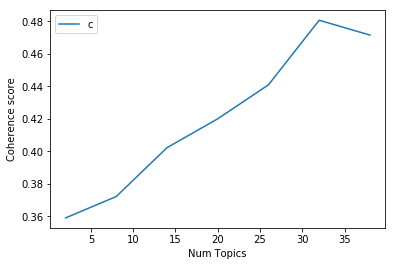

In [31]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3589
Num Topics = 8  has Coherence Value of 0.3721
Num Topics = 14  has Coherence Value of 0.4022
Num Topics = 20  has Coherence Value of 0.4199
Num Topics = 26  has Coherence Value of 0.4408
Num Topics = 32  has Coherence Value of 0.4806
Num Topics = 38  has Coherence Value of 0.4715


In [33]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.182*"dengue" + 0.139*"bangladesh" + 0.100*"fever" + 0.081*"hospitalise" + '
  '0.044*"spread" + 0.042*"rise" + 0.036*"mashrafe_mortaza" + '
  '0.034*"death_toll" + 0.020*"mashrafe" + 0.010*"bangladeshi"'),
 (1,
  '0.124*"patient" + 0.085*"people" + 0.055*"year" + 0.045*"hour" + '
  '0.043*"country" + 0.039*"number" + 0.030*"infect" + 0.030*"admit" + '
  '0.029*"record" + 0.026*"day"'),
 (2,
  '0.155*"die" + 0.144*"dhaka" + 0.115*"hospital" + 0.055*"dengue" + '
  '0.033*"khulna" + 0.025*"fever" + 0.023*"woman" + 0.021*"medical_college" + '
  '0.020*"borne" + 0.015*"mymensingh"'),
 (3,
  '0.123*"outbreak" + 0.119*"dengue" + 0.114*"bangladesh" + 0.028*"bad" + '
  '0.023*"worst_ever" + 0.023*"fever" + 0.022*"dead" + 0.022*"diagnose" + '
  '0.019*"child" + 0.016*"denguefever"'),
 (4,
  '0.197*"dengue" + 0.065*"case" + 0.052*"disease" + 0.047*"bangladesh" + '
  '0.031*"report" + 0.031*"death" + 0.021*"epidemic" + 0.019*"government" + '
  '0.016*"bear" + 0.015*"capital"'),
 (5,
  '0

In [34]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.2157,"mosquito, dhaka, aede, control, blood, mosquit...",Sayeed Khokon launches a drive in order to era...
1,1,6.0,0.1850,"mosquito, dhaka, aede, control, blood, mosquit...",What are the risk factors for the presence of ...
2,2,2.0,0.1564,"die, dhaka, hospital, dengue, khulna, fever, w...",Emergency (O-) Blood Needed for Dengue patient...
3,3,6.0,0.1718,"mosquito, dhaka, aede, control, blood, mosquit...","Dengue on the rise in #Dhaka , with 93 people ..."
4,4,6.0,0.1940,"mosquito, dhaka, aede, control, blood, mosquit...",The threat of #denguefever looms over as the m...
5,5,6.0,0.1486,"mosquito, dhaka, aede, control, blood, mosquit...",Low socio-economic zones of Dhaka may have hig...
6,6,4.0,0.1436,"dengue, case, disease, bangladesh, report, dea...",Recent findings on risk factors for the presen...
7,7,4.0,0.1528,"dengue, case, disease, bangladesh, report, dea...",# IEDCR reports 680 #dengue cases so far http:...
8,8,4.0,0.1374,"dengue, case, disease, bangladesh, report, dea...",New report on circulating #dengue virus seroty...
9,9,6.0,0.2517,"mosquito, dhaka, aede, control, blood, mosquit...","In Dhaka , city dwellers and the city corporat..."


In [40]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2080,"twitt, pic, awareness, continue, support, clea...",The rapid spread of the dengue in Bangladesh t...
1,1.0,0.1870,"dhaka, mosquitoe, city, chikungunya, risk, res...",AmdavadAMC there is a new construction site ( ...
2,2.0,0.2346,"dhaka, blood, contact, suffer, south, blood_ne...",Urgent Ab+ blood needed for a dengue patient b...
3,3.0,0.2410,"fever, health, www, department, pic, confirm, ...",LowTGimenez Curse: Florida Department of Heal...
4,4.0,0.1703,"disease, dengue, spread, mosquito_borne, infec...","How Dengue, a deadly mosquito-borne disease, i..."
